In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator, PercentFormatter

%config InlineBackend.figure_formats = ['svg']

# Topic 2. Randomness. Conversion of Probablity Disctribution

## Linear Congruential Generator (LCG)

If you forget, here's the formula,

\begin{align}
X_{n+1} = (aX_{n}+c)\ \text{mod}\ m
\end{align}

In [22]:
def LCGenerator(a, c, m, N):
    '''
    Args:
    Return:
    '''
    
    x = np.zeros(N)
    x[0] = int(N*np.random.uniform(0, 1))
    for n in range(1, N):
        x[n] = (a*x[n-1]+c) % m
    x = x/max(x)
    
    return x

(array([1003.,  995.,  997., 1000.,  993.,  983.,  989.,  961., 1026.,
        1053.]),
 array([3.25140311e-06, 1.00002926e-01, 2.00002601e-01, 3.00002276e-01,
        4.00001951e-01, 5.00001626e-01, 6.00001301e-01, 7.00000975e-01,
        8.00000650e-01, 9.00000325e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

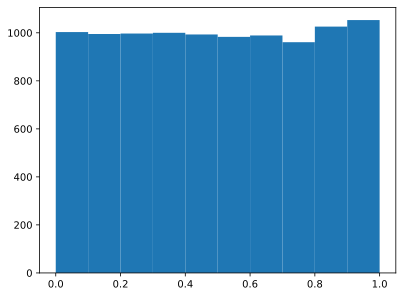

In [30]:
xrand = LCGenerator(a=16807, c=0, m=2**31-1, N=10000)

plt.hist(xrand)

## Box-Muller method

To sample from a distribution, it's common to use the inverse method. However, in order to use the inverse method, we'll have to know a close form expression. For normal distribution, this is hard.

Box-Muller uses two main ingredients: polar coordinate and two uniform distributions from $[0,1]$, let us call them $U_1$ and $U_2$. The result is going to be two indepedent random variables $X,Y$ distributed normally $N(\mu=0,\sigma=1)$.

\begin{align}
X = \sqrt{-2\log(U_1)}\cos(2\pi U_2)\\
Y = \sqrt{-2\log(U_1)}\sin(2\pi U_2)
\end{align}


In [71]:
def BoxMullerGenerator(N: int):
    '''
    Args
    Return
    '''
    U1 = np.random.uniform(0, 1, N)
    U2 = np.random.uniform(0, 1, N)
    
    X = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Y = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

    return X, Y

In [72]:
def normal_dist(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/2*sigma**2)

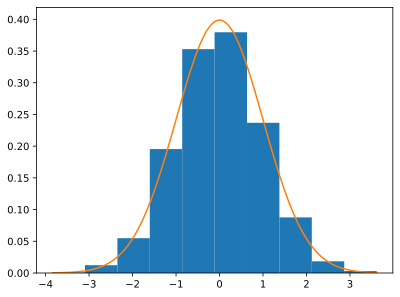

In [75]:
XrandN, YrandN = BoxMullerGenerator(N=10000) 

xrange = np.linspace(min(XrandN), max(XrandN), 100)

plt.hist(XrandN, density=True)
plt.plot(xrange, [normal_dist(x, mu=0, sigma=1) for x in xrange])

## Rejection Method

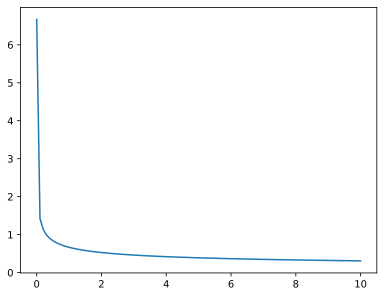

In [93]:
xrange = np.linspace(0.001, 10, 100)
plt.plot(xrange, [(2/3)*x**(-1/3) for x in xrange])

In [114]:
def rho(x):
    if x > 0.1:
        return (2/3)*x**(-1/3)
    else:
        return 14.362897933545888

In [117]:
def g(x, mu, sigma):
    return np.exp(-(x-mu)**2/2*sigma**2)/(sigma*np.sqrt(2*np.pi))

def C():
    x = np.linspace(0.0001, 10, 1000)
    return np.max(rho(x)/g(x, 0, 1))

(array([2.50320014, 0.21973524, 0.1821229 , 0.15242895, 0.15836774,
        0.13461258, 0.13659218, 0.13758198, 0.11580641, 0.11382682,
        0.13857178, 0.09897984, 0.10887782, 0.10689823, 0.09403085,
        0.09304105, 0.09304105, 0.08215327, 0.09897984, 0.08809206,
        0.08017367, 0.09304105, 0.09205125, 0.09897984, 0.06928589,
        0.08611246, 0.09205125, 0.08116347, 0.07027569, 0.07918387,
        0.06829609, 0.06928589, 0.08512266, 0.06532669, 0.09403085,
        0.08017367, 0.07324508, 0.0593879 , 0.07324508, 0.07522468,
        0.06730629, 0.0643369 , 0.0633471 , 0.04850012, 0.0643369 ,
        0.07126548, 0.07027569, 0.05641851, 0.05740831, 0.07423488,
        0.06730629, 0.06730629, 0.06730629, 0.0643369 , 0.05839811,
        0.05344911, 0.0643369 , 0.07522468, 0.0613675 , 0.0593879 ,
        0.04948992, 0.07621448, 0.05443891, 0.06532669, 0.04355113,
        0.05641851, 0.05542871, 0.07225528, 0.05443891, 0.05344911,
        0.0623573 , 0.0623573 , 0.05146952, 0.07

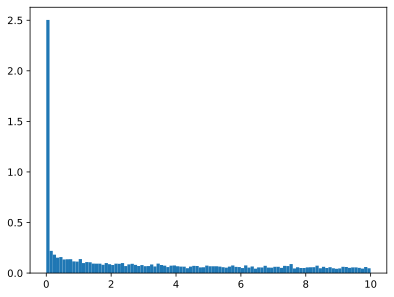

In [115]:
def sampler(N, a, b, Fmax, from_gaussian: bool):
    '''
    Args
    Return
    '''
    
    count = 0
    x_rho = []
    while count < N:    
        if from_gaussian == True:
            
        xrand = np.random.uniform(a, b, N)
        y = np.zeros(N)
        for n in range(N):
            y[n] = Fmax*np.random.uniform(0, 1)
            if y[n] <= rho(xrand[n]):
                count += 1
                x_rho.append(xrand[n])
                
    return x_rho

x_rho = sampler(N=10000, a=0.00001, b=10, Fmax=15)
plt.hist(x_rho, 100, density=True)